In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
clean_data = pd.read_csv('clean_data.csv')
clean_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,6.753438,6.751101,0.0,1.386294,1Fam,3,-1,6.561031,0.0,6,...,WD,0.0,Pave,2.197225,6.753438,3,0.000000,2003,2003,2008
1,7.141245,0.000000,0.0,1.386294,1Fam,3,3,6.886532,0.0,5,...,WD,0.0,Pave,1.945910,7.141245,3,5.700444,1976,1976,2007
2,6.825460,6.765039,0.0,1.386294,1Fam,3,1,6.188264,0.0,6,...,WD,0.0,Pave,1.945910,6.825460,3,0.000000,2001,2002,2008
3,6.869014,6.629363,0.0,1.386294,1Fam,4,-1,5.379897,0.0,5,...,WD,0.0,Pave,2.079442,6.629363,3,0.000000,1915,1970,2006
4,7.044033,6.960348,0.0,1.609438,1Fam,3,2,6.486161,0.0,6,...,WD,0.0,Pave,2.302585,7.044033,3,5.262690,2000,2000,2008


# Voici les variables importantes pour nos prédictions

In [3]:
var = ['OverallQual', 'ExterQual', 'Neighborhood', 'GarageCars', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'BsmtQual', 'GarageArea', 'KitchenQual', '1stFlrSF', 'FullBath', 'SalePrice']

## Réduction des données
Nous allons reduires nos données à ceci qui est le plus important pour nous

In [4]:
def is_there(elt, data):
    test = []
    exception = []
    for e in elt:
        test.append(e in data.columns)
        if not(e in data.columns): exception.append(e)

    return {
        'liste':test,
        'ex': exception
    }

### Vérifications
Vérifions que toutes les titres à récupérer existent dans la dataFrame

In [5]:
data_checking = is_there(var, clean_data)

In [6]:
data_checking['liste']

[True, True, True, True, True, True, True, True, True, True, True, True, False]

In [7]:
data_checking['ex']

['SalePrice']

### Soustration des titres d'exception dans var

In [8]:
for e in data_checking['ex']:
    if e in var:
        del var[var.index(e)]

len(var)

12

## Récupérations des colonnes qui nous intéressent

In [9]:
df = clean_data[var]
df.head()

,OverallQual,ExterQual,Neighborhood,GarageCars,GrLivArea,YearBuilt,TotalBsmtSF,BsmtQual,GarageArea,KitchenQual,1stFlrSF,FullBath
0,7,3,CollgCr,1.098612,7.444833,2003,6.753438,4,6.308098,3,6.753438,1.098612
1,6,2,Veenker,1.098612,7.141245,1976,7.141245,4,6.133398,2,7.141245,1.098612
2,7,3,CollgCr,1.098612,7.488294,2001,6.825460,4,6.411818,3,6.825460,1.098612
3,7,2,Crawfor,1.386294,7.448916,1915,6.629363,3,6.466145,3,6.869014,0.693147
4,8,3,NoRidge,1.386294,7.695758,2000,7.044033,4,6.729824,3,7.044033,1.098612


## Renommer les titres mal écrits dans la DataFrame

### Recupération des titres du dataFrame

In [10]:
title = df.columns
title

Index(['OverallQual', 'ExterQual', 'Neighborhood', 'GarageCars', 'GrLivArea',
       'YearBuilt', 'TotalBsmtSF', 'BsmtQual', 'GarageArea', 'KitchenQual',
       '1stFlrSF', 'FullBath'],
      dtype='object')

### Fonction de detection des titres mal écrits

In [11]:
def detect_var(elt):
    ret = []
    for e in elt:
        if e[0].isnumeric(): 
            ret.append(e)
    return ret

to_change = detect_var(title)
to_change

['1stFlrSF']

### Fonction pour créer l'objet de changement

In [12]:
def obj_generator(elt_list):
    obj_to_return = {}
    for e in elt_list:
        obj_to_return[e] = e[1:]
    
    return obj_to_return

obj_to_change = obj_generator(to_change)
obj_to_change

{'1stFlrSF': 'stFlrSF'}

### Remplacement des titres

In [13]:
df = df.rename(obj_to_change, axis=1)
df.head()

,OverallQual,ExterQual,Neighborhood,GarageCars,GrLivArea,YearBuilt,TotalBsmtSF,BsmtQual,GarageArea,KitchenQual,stFlrSF,FullBath
0,7,3,CollgCr,1.098612,7.444833,2003,6.753438,4,6.308098,3,6.753438,1.098612
1,6,2,Veenker,1.098612,7.141245,1976,7.141245,4,6.133398,2,7.141245,1.098612
2,7,3,CollgCr,1.098612,7.488294,2001,6.825460,4,6.411818,3,6.825460,1.098612
3,7,2,Crawfor,1.386294,7.448916,1915,6.629363,3,6.466145,3,6.869014,0.693147
4,8,3,NoRidge,1.386294,7.695758,2000,7.044033,4,6.729824,3,7.044033,1.098612


# Analyse des valeurs des colonnes
Nous allons vérifier la quantité des valeurs que chaque colonne contient

### Functions utiles

In [14]:
def col_select(start, end, data_frame):
    return data_frame.columns[list(range(start, end+1))]

def data_col_select(start, end, data_frame):
    return data_frame[col_select(start, end, data_frame)]

def data_col_del(col, data, inplace_var = False):
    return data.drop(col, axis=1, inplace = inplace_var)

In [15]:
df.head()

,OverallQual,ExterQual,Neighborhood,GarageCars,GrLivArea,YearBuilt,TotalBsmtSF,BsmtQual,GarageArea,KitchenQual,stFlrSF,FullBath
0,7,3,CollgCr,1.098612,7.444833,2003,6.753438,4,6.308098,3,6.753438,1.098612
1,6,2,Veenker,1.098612,7.141245,1976,7.141245,4,6.133398,2,7.141245,1.098612
2,7,3,CollgCr,1.098612,7.488294,2001,6.825460,4,6.411818,3,6.825460,1.098612
3,7,2,Crawfor,1.386294,7.448916,1915,6.629363,3,6.466145,3,6.869014,0.693147
4,8,3,NoRidge,1.386294,7.695758,2000,7.044033,4,6.729824,3,7.044033,1.098612


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   2919 non-null   int64  
 1   ExterQual     2919 non-null   int64  
 2   Neighborhood  2919 non-null   object 
 3   GarageCars    2919 non-null   float64
 4   GrLivArea     2919 non-null   float64
 5   YearBuilt     2919 non-null   int64  
 6   TotalBsmtSF   2919 non-null   float64
 7   BsmtQual      2919 non-null   int64  
 8   GarageArea    2919 non-null   float64
 9   KitchenQual   2919 non-null   int64  
 10  stFlrSF       2919 non-null   float64
 11  FullBath      2919 non-null   float64
dtypes: float64(6), int64(5), object(1)
memory usage: 273.8+ KB


In [17]:
df.shape

(2919, 12)

In [18]:
df.describe()

,OverallQual,ExterQual,GarageCars,GrLivArea,YearBuilt,TotalBsmtSF,BsmtQual,GarageArea,KitchenQual,stFlrSF,FullBath
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,6.089072,2.396711,0.971629,7.261502,1971.312778,6.730833,3.479616,5.814763,2.510791,7.004186,0.919276
std,1.409947,0.580293,0.323623,0.324750,30.291442,1.182460,0.900943,1.435658,0.662159,0.322650,0.220712
min,1.000000,1.000000,0.000000,5.814131,1872.000000,0.000000,0.000000,0.000000,1.000000,5.814131,0.000000
25%,5.000000,2.000000,0.693147,7.027315,1953.500000,6.677083,3.000000,5.771441,2.000000,6.776507,0.693147
50%,6.000000,2.000000,1.098612,7.275865,1973.000000,6.897705,4.000000,6.175867,2.000000,6.987490,1.098612
75%,7.000000,3.000000,1.098612,7.464223,2001.000000,7.172425,4.000000,6.357842,3.000000,7.235979,1.098612
max,10.000000,4.000000,1.791759,8.638171,2010.000000,8.717846,5.000000,7.305860,4.000000,8.536211,1.609438


In [19]:
df.head()

,OverallQual,ExterQual,Neighborhood,GarageCars,GrLivArea,YearBuilt,TotalBsmtSF,BsmtQual,GarageArea,KitchenQual,stFlrSF,FullBath
0,7,3,CollgCr,1.098612,7.444833,2003,6.753438,4,6.308098,3,6.753438,1.098612
1,6,2,Veenker,1.098612,7.141245,1976,7.141245,4,6.133398,2,7.141245,1.098612
2,7,3,CollgCr,1.098612,7.488294,2001,6.825460,4,6.411818,3,6.825460,1.098612
3,7,2,Crawfor,1.386294,7.448916,1915,6.629363,3,6.466145,3,6.869014,0.693147
4,8,3,NoRidge,1.386294,7.695758,2000,7.044033,4,6.729824,3,7.044033,1.098612


### la colonne 'Neighborhood' mérite notre attention

In [20]:
df.Neighborhood.value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

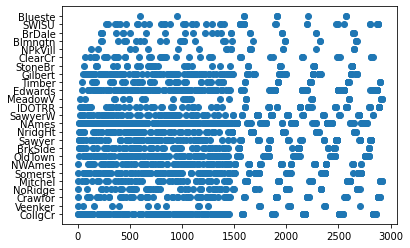

In [21]:
plt.scatter(df.index, df['Neighborhood'])

Les données sont conformes. 

# Préparation à la prédiction

### Encodage des données

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Il n'y a que la colonne Neighborhood qui a besoin d'être encodé
df.Neighborhood = le.fit_transform(df.Neighborhood)

df.head()

,OverallQual,ExterQual,Neighborhood,GarageCars,GrLivArea,YearBuilt,TotalBsmtSF,BsmtQual,GarageArea,KitchenQual,stFlrSF,FullBath
0,7,3,5,1.098612,7.444833,2003,6.753438,4,6.308098,3,6.753438,1.098612
1,6,2,24,1.098612,7.141245,1976,7.141245,4,6.133398,2,7.141245,1.098612
2,7,3,5,1.098612,7.488294,2001,6.825460,4,6.411818,3,6.825460,1.098612
3,7,2,6,1.386294,7.448916,1915,6.629363,3,6.466145,3,6.869014,0.693147
4,8,3,15,1.386294,7.695758,2000,7.044033,4,6.729824,3,7.044033,1.098612


## Préparation de la machine

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor

### Reconstitution des données en ajoutant 'SalePrice' qui manquait dans 'clean_data.csv'

In [24]:
price_data = pd.read_csv('sample_submission.csv')


In [25]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

### Association des deux fichiers 'train.csv' et 'test.csv'

In [26]:
full_data = pd.concat((train, test)).sort_index(axis = 0).sort_values('Id')


On peut voir que le nombre de ligne a changé

In [27]:
full_data.shape

(2919, 81)

### On remplace les cases vides avec le prix minimum trouvé

In [28]:
full_data['SalePrice'].fillna(34900 , inplace=True)

### Ajout de la colonne 'SalePrice' dans la dataFrame de 'clean_data.csv'

In [29]:
df['SalePrice'] = full_data['SalePrice'].tolist()

On peut voir la colonne 'SalePrice' cette fois-ci

In [30]:
df.head()

,OverallQual,ExterQual,Neighborhood,GarageCars,GrLivArea,YearBuilt,TotalBsmtSF,BsmtQual,GarageArea,KitchenQual,stFlrSF,FullBath,SalePrice
0,7,3,5,1.098612,7.444833,2003,6.753438,4,6.308098,3,6.753438,1.098612,208500.0
1,6,2,24,1.098612,7.141245,1976,7.141245,4,6.133398,2,7.141245,1.098612,181500.0
2,7,3,5,1.098612,7.488294,2001,6.825460,4,6.411818,3,6.825460,1.098612,223500.0
3,7,2,6,1.386294,7.448916,1915,6.629363,3,6.466145,3,6.869014,0.693147,140000.0
4,8,3,15,1.386294,7.695758,2000,7.044033,4,6.729824,3,7.044033,1.098612,250000.0


In [31]:
df.describe()

,OverallQual,ExterQual,Neighborhood,GarageCars,GrLivArea,YearBuilt,TotalBsmtSF,BsmtQual,GarageArea,KitchenQual,stFlrSF,FullBath,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.00000
mean,6.089072,2.396711,12.437136,0.971629,7.261502,1971.312778,6.730833,3.479616,5.814763,2.510791,7.004186,0.919276,107935.61014
std,1.409947,0.580293,5.957992,0.323623,0.324750,30.291442,1.182460,0.900943,1.435658,0.662159,0.322650,0.220712,92129.95821
min,1.000000,1.000000,0.000000,0.000000,5.814131,1872.000000,0.000000,0.000000,0.000000,1.000000,5.814131,0.000000,34900.00000
25%,5.000000,2.000000,7.000000,0.693147,7.027315,1953.500000,6.677083,3.000000,5.771441,2.000000,6.776507,0.693147,34900.00000
50%,6.000000,2.000000,12.000000,1.098612,7.275865,1973.000000,6.897705,4.000000,6.175867,2.000000,6.987490,1.098612,34900.00000
75%,7.000000,3.000000,17.000000,1.098612,7.464223,2001.000000,7.172425,4.000000,6.357842,3.000000,7.235979,1.098612,163000.00000
max,10.000000,4.000000,24.000000,1.791759,8.638171,2010.000000,8.717846,5.000000,7.305860,4.000000,8.536211,1.609438,755000.00000


In [32]:
x = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [33]:
sc = StandardScaler()
x = sc.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True, random_state=0)

In [34]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Prédictions de 'X_test'

In [35]:
predictions = xgb.predict(X_test)

In [36]:
diff = y_test - predictions

## Visualisation de la différence

C:\Users\AshWindows\AppData\Local\Temp\ipykernel_16520\668418042.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


<Axes: xlabel='SalePrice', ylabel='Density'>

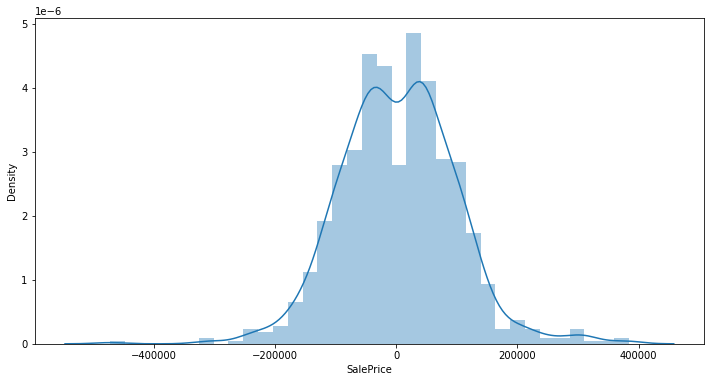

In [37]:
plt.figure(figsize = (12,6))
sns.distplot(diff)

# Vérification du score R^2


In [38]:
xgb_r2_score = xgb.score(X_test, y_test)

print("XGBoost R2 Score: ", (xgb_r2_score))

XGBoost R2 Score:  -0.10681738300794552


In [39]:
pickle.dump(xgb, open('regression_model.sav', 'wb'))